In [ ]:
import pandas as pd
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 관측소 리스트를 데이터프레임 변환
df = pd.read_csv('./c_project/LOCAL_PEOPLE_20210505.csv', encoding='ANSI')
df

#### 소상공인시장진흥공단_상가(상권)정보

In [1]:
##소상공인 상가업소 정보서비스 OPEN API##
#함수 만들기
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

def baro_api(skey, res_id, encode) :

    stype = 'json'
    url = 'http://apis.data.go.kr/B553077/api/open/sdsc/baroApi'
    params = f'?ServiceKey={skey}&type={stype}&resId={res_id}&' + encode
    query = url + params
    print(query)

    request = Request(query)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
    #print(response_body)

    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['body']['items']

    df = pd.DataFrame(items)
    return df

In [ ]:
#업종 대분류 
skey = ""
res_id = 'upjong'
encode = urlencode({ quote_plus('catId') : 'large'})

large_upjong = baro_api(skey, res_id, encode)
print(large_upjong)

#Q

In [ ]:
#업종 중분류
skey = ""
res_id = 'upjong'
encode = urlencode({ quote_plus('catId') : 'middle', quote_plus('indsLclsCd') : 'Q'})

middle_upjong = baro_api(skey, res_id, encode)
middle_upjong
#Q12

In [2]:
#업종 소분류 
skey = ""
res_id = 'upjong'
encode = urlencode({ quote_plus('catId') : 'small', quote_plus('indsLclsCd') : 'Q', quote_plus('indsMclsCd') : 'Q12'})
#http://apis.data.go.kr/B553077/api/open/sdsc/baroApi?resId=upjong&catId=small&indsLclsCd=Q&indsMclsCd=Q01&ServiceKey=서비스인증키
small_upjong = baro_api(skey, res_id, encode)
small_upjong
#Q12A03, #Q12A01

http://apis.data.go.kr/B553077/api/open/sdsc/baroApi?ServiceKey=%2FsSRvcxOLRcNINcUjuJ5YGCfoQn6PkiCu%2BfwOs89KrpRt1ZEepe0J69HscCIXXMdVZetcI3RTqMOx2ym7pQ7uQ%3D%3D&type=json&resId=upjong&catId=small&indsLclsCd=Q&indsMclsCd=Q12


,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,stdrDt
0,Q,음식,Q12,커피점/카페,Q12A04,보드게임카페,2021-03-31
1,Q,음식,Q12,커피점/카페,Q12A05,사주카페,2021-03-31
2,Q,음식,Q12,커피점/카페,Q12A03,생과일주스전문점,2021-03-31
3,Q,음식,Q12,커피점/카페,Q12A07,애견카페,2021-03-31
4,Q,음식,Q12,커피점/카페,Q12A06,전통찻집/인삼찻집,2021-03-31
5,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,2021-03-31


In [ ]:
#커피점/카페 조회
import math
#http://apis.data.go.kr/B553077/api/open/sdsc/baroApi?resId=store&catId=upjong&divId=indsLclsCd&key=Q&ServiceKey=서비스인증키
#quote_plus('ctprvnCd') : '11'

skey = ""
res_id = 'store'

cafe = pd.DataFrame()
for pageNo in range(1,51):
    encode = urlencode({ quote_plus('catId') : 'upjong', quote_plus('divId') : 'indsMclsCd', quote_plus('key') : 'Q12',
                         quote_plus('numOfRows') : '1000', quote_plus('pageNo') : pageNo})
    
    baro = baro_api(skey, res_id, encode)
    cafe_all = baro[baro['ctprvnCd'] == '11'] 
    cafe = cafe.append(cafe_all)

In [ ]:
for pageNo in range(51,115):
    encode = urlencode({ quote_plus('catId') : 'upjong', quote_plus('divId') : 'indsMclsCd', quote_plus('key') : 'Q12',
                         quote_plus('numOfRows') : '1000', quote_plus('pageNo') : pageNo})
    
    baro = baro_api(skey, res_id, encode)
    cafe_all = baro[baro['ctprvnCd'] == '11'] 
    cafe= cafe.append(cafe_all)

In [ ]:
cafe = cafe[(cafe['indsSclsCd'] == 'Q12A03') | (cafe['indsSclsCd'] == 'Q12A01')]
cafe

In [ ]:
cafe.to_csv('./c_project/cafe_seoul.csv', index=False, header=True, encoding='utf-8')
cafe.to_excel('./c_project/cafe_seoul.xlsx', index=False, header=True, encoding='utf-8')

In [ ]:
import pandas as pd
cafe = pd.read_csv('./c_project/cafe_seoul.csv')
cafe.duplicated().value_counts() #중복데이터 없음 

#### SGIS API

In [ ]:
#좌표계 변환 
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

#좌표계 변환 함수 (4326 -> 5179)
def SGIS_XY_api(token, x, y) :

    url = 'https://sgisapi.kostat.go.kr/OpenAPI3/transformation/transcoord.json'
    params = f'?accessToken={token}&src=4326&dst=5179&posX={x}&posY={y}'
    query = url + params
    print(query)

    request = Request(query)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
    print(response_body)

    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['result']
    x = items['posX']
    y = items['posY']
    data = {'x_coor' : [x], 'y_coor' : [y]}
    
    df = pd.DataFrame(data)
    #df = pd.DataFrame(x_coor, y_coor)
    #code = items['tot_reg_cd']

    return df

In [ ]:
#cafe 데이터 좌표계 변환 
token = ''

df = pd.DataFrame()
for lon, lat in zip(cafe.lon, cafe.lat):

    x = lon #상가 데이터 위도 경도 변수가 잘못되어 있음 ..ㅎ
    y = lat
    
    df = df.append(SGIS_XY_api(token, x, y))

In [ ]:
# 5179 좌표 저장 
df.to_csv('./c_project/to_5179.csv', index=False, header=True, encoding='utf-8')

In [34]:
#좌표값으로 집계구 구하는 함수 
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

def SGIS_jip_api(token, x, y) :

    url = 'https://sgisapi.kostat.go.kr/OpenAPI3/personal/findcodeinsmallarea.json'
    params = f'?accessToken={token}&x_coor={x}&y_coor={y}'
    query = url + params
    print(query)

    request = Request(query)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
    print(response_body)

    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['result']
    code = items['tot_reg_cd']
    
    data = {'집계구' : [code]}
    df = pd.DataFrame(data)

    return df

In [44]:
cafe

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,rdnmAdr,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat,x_coor,y_coor
0,11662951,스타벅스,대학로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 종로구 대학로 122,110809,3086,NaN,4,NaN,127.002233,37.582185,956050.4640,1953760.595
1,11711567,잠바주스용산미군기지점,용산미군기지점,Q,음식,Q12,커피점/카페,Q12A03,생과일주스전문점,I56220,...,서울특별시 용산구 두텁바위로 54-33,140833,4353,NaN,1,NaN,126.979164,37.544495,953990.4157,1949590.163
2,11702898,더카페,면목홈플러스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 중랑구 면목천로 33,131200,2236,NaN,NaN,NaN,127.081195,37.579203,963020.8808,1953395.838
3,11236966,밀탑,미아점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 성북구 동소문로 315,136719,2730,NaN,9,NaN,127.028726,37.608392,958404.1845,1956656.075
4,11569118,공차,강남삼성점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 서초구 서초대로74길 23,137070,6621,NaN,15,NaN,127.027078,37.495621,958195.8242,1944145.516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,9780390,스타벅스월계이마트점,월계이마트점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 노원구 마들로3길 15,139842,1906,NaN,1,NaN,127.061966,37.626501,961347.4893,1958651.036
21956,9816934,썬투커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 양천구 오목로 319,158050,8000,NaN,NaN,NaN,126.873050,37.525068,944602.0815,1947492.013
21957,9852151,투썸플레이스,광교점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 중구 청계천로 54,100200,4540,NaN,NaN,NaN,126.983343,37.568391,954374.1782,1952239.230
21958,9872378,에스프레소6230,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 종로구 율곡로 51,110240,3060,NaN,1,NaN,126.984908,37.576513,954517.3324,1953139.661


In [67]:
cafe_1 = cafe.iloc[0:5001]
cafe_2 = cafe.iloc[5001:10001]
cafe_3 = cafe.iloc[10001:]

In [68]:
cafe_3

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,rdnmAdr,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat,x_coor,y_coor
10001,16977073,씨제이프레시웨이모닝해즈인재원,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 중구 필동로 26,100272,4626,NaN,NaN,NaN,126.995693,37.559089,955459.3031,1951201.386
10002,16977092,감성커피,고덕역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 강동구 고덕로 262,134825,5269,NaN,NaN,NaN,127.154611,37.554658,969493.2173,1950646.262
10003,16977123,커피베이,여의도순복음교회점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 영등포구 국회대로76길 25,150868,7239,NaN,NaN,NaN,126.923650,37.530090,949076.5873,1948020.609
10004,16977274,후니드수협중앙회카페송파점어펜딕스,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 송파구 오금로 62,138730,5510,NaN,NaN,NaN,127.105462,37.516370,965134.2607,1946415.576
10005,16977283,커피와함께,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 은평구 가좌로7길 12,122952,3480,NaN,1,NaN,126.919690,37.586495,948765.3909,1954280.613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,9780390,스타벅스월계이마트점,월계이마트점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 노원구 마들로3길 15,139842,1906,NaN,1,NaN,127.061966,37.626501,961347.4893,1958651.036
21956,9816934,썬투커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 양천구 오목로 319,158050,8000,NaN,NaN,NaN,126.873050,37.525068,944602.0815,1947492.013
21957,9852151,투썸플레이스,광교점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 중구 청계천로 54,100200,4540,NaN,NaN,NaN,126.983343,37.568391,954374.1782,1952239.230
21958,9872378,에스프레소6230,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,서울특별시 종로구 율곡로 51,110240,3060,NaN,1,NaN,126.984908,37.576513,954517.3324,1953139.661


In [ ]:
#cafe 좌표값으로 집계구 구하기 
token = ''

df = pd.DataFrame()
for x, y in zip(cafe_3.x_coor, cafe_3.y_coor):

    x = x 
    y = y
    
    df = df.append(SGIS_jip_api(token, x, y))

In [71]:
df.to_excel('./c_project/cafe_3.xlsx', index=False, header=True, encoding='utf-8')

In [70]:
df

,집계구
0,1102057010005
0,1125054010004
0,1119054010002
0,1124077010002
0,1112073010021
...,...
0,1111053030001
0,1115051010002
0,1102055010001
0,1101054010005


In [76]:
cafe = pd.read_excel('./c_project/cafe_seoul.xlsx')
cafe

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat,x_coor,y_coor,집계구
0,11662951,스타벅스,대학로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,110809,3086,NaN,4,NaN,127.002233,37.582185,956050.4640,1953760.595,1101064010002
1,11711567,잠바주스용산미군기지점,용산미군기지점,Q,음식,Q12,커피점/카페,Q12A03,생과일주스전문점,I56220,...,140833,4353,NaN,1,NaN,126.979164,37.544495,953990.4157,1949590.163,1103052010004
2,11702898,더카페,면목홈플러스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,131200,2236,NaN,NaN,NaN,127.081195,37.579203,963020.8808,1953395.838,1107055030001
3,11236966,밀탑,미아점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,136719,2730,NaN,9,NaN,127.028726,37.608392,958404.1845,1956656.075,1108068010001
4,11569118,공차,강남삼성점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,137070,6621,NaN,15,NaN,127.027078,37.495621,958195.8242,1944145.516,1122052010001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,9780390,스타벅스월계이마트점,월계이마트점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,139842,1906,NaN,1,NaN,127.061966,37.626501,961347.4893,1958651.036,1111053030001
21956,9816934,썬투커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,158050,8000,NaN,NaN,NaN,126.873050,37.525068,944602.0815,1947492.013,1115051010002
21957,9852151,투썸플레이스,광교점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,100200,4540,NaN,NaN,NaN,126.983343,37.568391,954374.1782,1952239.230,1102055010001
21958,9872378,에스프레소6230,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,110240,3060,NaN,1,NaN,126.984908,37.576513,954517.3324,1953139.661,1101054010005


In [88]:
cafe_jip = cafe['집계구'].value_counts()
cafe_jip = pd.DataFrame(cafe_jip)
cafe_jip.rename(columns = {'집계구' : 'cafe_count'}, inplace = True)

In [95]:
cafe_jip.describe()

,cafe_count
count,6071.000000
mean,3.617197
std,6.953202
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,220.000000


In [98]:
cafe_jip.to_csv('./c_project/집계구별_카페수.csv', header=True, encoding='utf-8')

In [ ]:
http://openapi.seoul.go.kr:8088/sample/xml/SPOP_LOCAL_RESD_DONG/1/5/

In [9]:
import pandas as pd
cafe = pd.read_csv('./c_project/cafe_seoul.csv', encoding='utf-8')   #adongCd 단위 
cafe_dong = cafe['adongCd'].value_counts()
cafe_dong = pd.DataFrame(cafe_dong)
cafe_dong #행정동은 425개 인데...?  이유 : 수유 1~3동, 번 1~3동 행정동 코드 변경 

,adongCd
1168064000,648
1144066000,477
1141058500,309
1156054000,297
1111061500,297
...,...
1171069000,3
1171072000,3
1111070000,2
1174069000,2


In [16]:
cafe_dong = cafe_dong.rename_axis('dong').reset_index().rename(columns = {'adongCd':'cafe_num'})

In [19]:
cafe_dong.to_csv('./c_project/행정동별_카페수.csv')

### 행정동별 유동인구

In [24]:
import os

path = './c_project/people/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

In [25]:
file_list_py

['LOCAL_PEOPLE_DONG_201912.csv',
 'LOCAL_PEOPLE_DONG_202001.csv',
 'LOCAL_PEOPLE_DONG_202002.csv',
 'LOCAL_PEOPLE_DONG_202003.csv',
 'LOCAL_PEOPLE_DONG_202004.csv',
 'LOCAL_PEOPLE_DONG_202005.csv',
 'LOCAL_PEOPLE_DONG_202006.csv',
 'LOCAL_PEOPLE_DONG_202007.csv',
 'LOCAL_PEOPLE_DONG_202008.csv',
 'LOCAL_PEOPLE_DONG_202009.csv',
 'LOCAL_PEOPLE_DONG_202010.csv',
 'LOCAL_PEOPLE_DONG_202011.csv']

In [69]:
people = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i)
    
    people = pd.concat([people,data])

In [72]:
people_columns = people.columns.values

In [92]:
people.reset_index(drop=True, inplace=True)

In [76]:
people.drop('여자70세이상생활인구수', axis=1, inplace=True)

In [77]:
people.columns = people_columns

In [79]:
people.head()
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724416 entries, 0 to 3724415
Data columns (total 32 columns):
 #   Column           Dtype  
---  ------           -----  
 0   기준일ID            object 
 1   시간대구분            float64
 2   행정동코드            float64
 3   총생활인구수           float64
 4   남자0세부터9세생활인구수    float64
 5   남자10세부터14세생활인구수  float64
 6   남자15세부터19세생활인구수  float64
 7   남자20세부터24세생활인구수  float64
 8   남자25세부터29세생활인구수  float64
 9   남자30세부터34세생활인구수  float64
 10  남자35세부터39세생활인구수  float64
 11  남자40세부터44세생활인구수  float64
 12  남자45세부터49세생활인구수  float64
 13  남자50세부터54세생활인구수  float64
 14  남자55세부터59세생활인구수  float64
 15  남자60세부터64세생활인구수  float64
 16  남자65세부터69세생활인구수  float64
 17  남자70세이상생활인구수     float64
 18  여자0세부터9세생활인구수    float64
 19  여자10세부터14세생활인구수  float64
 20  여자15세부터19세생활인구수  float64
 21  여자20세부터24세생활인구수  float64
 22  여자25세부터29세생활인구수  float64
 23  여자30세부터34세생활인구수  float64
 24  여자35세부터39세생활인구수  float64
 25  여자40세부터44세생활인구수  float64
 26  여자45세부터49세생활인구수  float64
 27  여자50세부터54세생활

In [84]:
people = people.iloc[:,[0,1,2,7,8,9,10,11,12,21,22,23,24,25,26]]

In [88]:
people = people[(people['시간대구분']>=8) & (people['시간대구분']<=20)]

In [103]:
people['people'] = people.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14]].sum(axis=1)

In [104]:
people.head()

,기준일ID,시간대구분,행정동코드,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,people
0,20191201,8.0,11500570.0,452.9466,753.1058,705.1822,1034.0260,859.8899,804.9566,632.2611,865.7865,886.7880,1182.4961,864.2856,848.9401,9890.6645
1,20191201,8.0,11410565.0,957.7930,1127.4360,1045.4001,1217.9166,1154.3984,1216.1001,1730.4971,1275.4848,1163.5455,1247.6368,938.7681,980.4056,14055.3821
2,20191201,8.0,11350600.0,2653.1523,1760.9506,1260.2312,1402.2297,1525.9477,1866.9504,3038.7949,1443.3843,1439.1696,1602.4965,1683.4175,1943.8291,21620.5538
3,20191201,8.0,11410640.0,495.4800,595.2504,589.2113,617.1885,518.4969,736.0194,613.2501,606.6731,526.9935,562.6643,558.5214,789.3085,7209.0574
4,20191201,8.0,11380632.0,469.7351,657.0880,543.4253,802.2580,661.1724,824.8548,560.6650,548.3154,592.3454,732.6861,731.1151,732.5852,7856.2458


In [125]:
people = people.iloc[:,[0,1,2,15]]

In [128]:
people_month = people.groupby(['기준일ID', '행정동코드']).sum()

In [140]:
people_dong = people.groupby(['행정동코드']).sum()

In [146]:
people_dong.drop('기준일ID', axis=1, inplace=True)

In [151]:
people_dong.to_csv('./c_project/people/행정동별_유동인구.csv')

#### 동이름 추가

In [208]:
people = pd.read_csv('./c_project/people/행정동별_유동인구.csv', encoding='utf-8')
people.head()

,행정동코드,people
0,11110515,3.705171e+07
1,11110530,8.408091e+07
2,11110540,1.790483e+07
3,11110550,2.646535e+07
4,11110560,3.009369e+07


In [209]:
people.set_index('행정동코드', inplace=True)

In [271]:
#예전 행정동 코드
dong_old = pd.read_excel('./c_project/행정동코드_매핑정보_2018.xlsx')

In [272]:
dong_old = dong_old[['행자부행정동코드', '행정동명']]

In [273]:
dong_old.drop(dong_old.index[0], axis=0, inplace=True)

In [274]:
dong_old['행자부행정동코드'] = dong_old['행자부행정동코드'].astype(int)

In [275]:
dong_old.set_index('행자부행정동코드', inplace=True)

In [276]:
people = people.join(dong_old, how='left')

In [234]:
people.to_csv('./c_project/people/행정동별(추가)_유동인구.csv')

In [277]:
#카페 수 
cafe = pd.read_csv('./c_project/행정동별_카페수.csv', encoding='utf-8')
cafe.set_index('dong', inplace=True)

In [278]:
#최신 행정동 코드
dong = pd.read_excel('./c_project/행정동_20210401.xlsx')
dong.set_index('행정동코드', inplace=True)

In [279]:
dong = dong[['읍면동명']]
dong.head()

,읍면동명
행정동코드,
1100000000,NaN
1111000000,NaN
1111051500,청운효자동
1111053000,사직동
1111054000,삼청동


In [282]:
cafe = cafe.join(dong, how='inner')

In [283]:
cafe.to_csv('./c_project/people/행정동별(추가)_카페수.csv')

#### 유동인구 행정동 코드 변환 

In [297]:
people = pd.read_csv('./c_project/people/행정동별_유동인구.csv', encoding='utf-8')
people.set_index('행정동코드', inplace=True)

In [298]:
dong = pd.read_excel('./c_project/행정동_20210401.xlsx')
dong.set_index('행정동코드_OLD', inplace=True)

In [299]:
people = people.join(dong, how='left')
people.reset_index(inplace=True, drop=True)
people.drop(['시도명','시군구명'],axis=1,inplace=True)

In [310]:
people.head()

,people,행정동코드,읍면동명
0,3.705171e+07,1111051500,청운효자동
1,8.408091e+07,1111053000,사직동
2,1.790483e+07,1111054000,삼청동
3,2.646535e+07,1111055000,부암동
4,3.009369e+07,1111056000,평창동


In [311]:
people.to_csv('./c_project/people/행정동별(추가)_유동인구_동코드수정.csv', index=True)

In [312]:
people.drop('읍면동명',axis=1,inplace=True)

In [313]:
people.to_csv('./c_project/people/행정동별_유동인구_동코드수정.csv', index=True)

#### 유동인구 + 카페 수 + 행정동코드들

In [19]:
import pandas as pd
people = pd.read_csv('./c_project/people/행정동별_유동인구_동코드수정.csv', encoding='utf-8')
people.set_index('행정동코드', inplace=True)
people.drop('Unnamed: 0',axis=1,inplace=True)

cafe = pd.read_csv('./c_project/행정동별_카페수.csv', encoding='utf-8')
cafe.set_index('dong', inplace=True)

cafe_people = cafe.join(people, how='left')
cafe_people.to_csv('./c_project/cafe_people.csv')

In [20]:
cafe_people = pd.read_csv('./c_project/cafe_people.csv')
cafe_people

,dong,cafe_num,people
0,1168064000,648,4.192040e+08
1,1144066000,477,2.501855e+08
2,1141058500,309,1.787167e+08
3,1156054000,297,3.236224e+08
4,1111061500,297,2.323360e+08
...,...,...,...
420,1135061200,3,2.626630e+07
421,1171069000,3,3.755269e+07
422,1171072000,3,1.663410e+07
423,1111070000,2,1.566215e+07


In [126]:
#통계청 및 OLD 행정동 코드 추가 
##OLD 행정동코드 추가 
dong = pd.read_excel('./c_project/행정동_20210401.xlsx',dtype={'행정동코드': object,'행정동코드_OLD': object, '시도명': object,'시군구명': object, '읍면동명': object})
dong.set_index('행정동코드', inplace=True)

cafe_people = pd.read_csv('./c_project/cafe_people.csv',dtype={'dong': object})
cafe_people.set_index('dong', inplace=True)

cafe_people = dong.join(cafe_people, how='inner')
cafe_people.drop(['시도명','시군구명'],axis=1,inplace=True)

In [127]:
cafe_people = cafe_people.reset_index().rename(columns={'index':'행정동코드'})
cafe_people.to_csv('./c_project/cafe_people_중간.csv', index=False, encoding='utf-8')

In [128]:
cafe_people = pd.read_csv('./c_project/cafe_people_중간.cscv', dtype={'행정동코드': object,'행정동코드_OLD': object})
cafe_people.set_index('행정동코드_OLD', inplace=True)

,행정동코드,행정동코드_OLD,읍면동명,cafe_num,people
0,1111051500,11110515,청운효자동,55,3.705171e+07
1,1111053000,11110530,사직동,140,8.408091e+07
2,1111054000,11110540,삼청동,120,1.790483e+07
3,1111055000,11110550,부암동,62,2.646535e+07
4,1111056000,11110560,평창동,61,3.009369e+07


In [139]:
dong_2 = pd.read_excel('./c_project/행정동_통계청.xlsx', dtype={'통계청행정동코드': object, '행자부행정동코드': object})
dong_2.set_index('행자부행정동코드', inplace=True)
dong_2 = dong_2[['통계청행정동코드']]
dong_2.drop(dong_2.index[0], inplace=True)

In [140]:
cafe_people_new = cafe_people.join(dong_2)
cafe_people_new.to_csv('./c_project/cafe_people_final.csv', index=False, encoding='utf-8')

### 신한카드 매출 데이터 식 

In [98]:
test_data = pd.read_excel('./c_project/test_data.xlsx')

In [149]:
#월별 매출 
pdf_amount = pd.pivot_table(test_data,
                            index = ['TOT_REG_CD'],
                            columns = ['TS_YM'],
                            values = 'AMT_CORR',
                            aggfunc = 'sum')

In [150]:
#월별 이용건수 
pdf_cnt = pd.pivot_table(test_data,
                            index = ['TOT_REG_CD'],
                            columns = ['TS_YM'],
                            values = 'USECT_CORR',
                            aggfunc = 'sum')

In [151]:
pdf_amount.to_excel('./c_project/집계구별_월별_매출.xlsx')
pdf_cnt.to_excel('./c_project/집계구별_월별_이용건수.xlsx')

In [175]:
card_amount = pd.read_excel('./c_project/집계구별_월별_매출.xlsx')
card_cnt = pd.read_excel('./c_project/집계구별_월별_이용건수.xlsx')

In [177]:
card_amount = card_amount.rename(columns={'TOT_REG_CD':'집계구'})
card_amount.set_index('집계구', inplace=True)

card_cnt = card_cnt.rename(columns={'TOT_REG_CD':'집계구'})
card_cnt.set_index('집계구', inplace=True)

In [178]:
def division_30(n) :
    return round(n/30)

def division_31(n) :
    return round(n/31)

def division_29(n) :
    return round(n/29)

In [179]:
card_cnt.head()

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
집계구,,,,,,,,,,,,
1101053010006,12090.0,106738.0,270575.0,27838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106088030002,NaN,NaN,NaN,478550.0,383409.0,1061166.0,419709.0,NaN,NaN,NaN,NaN,NaN
1111078060103,NaN,NaN,NaN,NaN,NaN,NaN,4701.0,NaN,NaN,NaN,NaN,NaN
1122053010001,NaN,NaN,NaN,NaN,NaN,NaN,1441674.0,1456845.0,1029016.0,51317.0,55200.0,1810347.0
1124056010006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505140.0


In [180]:
card_amount.head()

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
집계구,,,,,,,,,,,,
1101053010006,120900.0,1067380.0,2705750.0,278380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106088030002,NaN,NaN,NaN,4785500.0,3834090.0,10611660.0,4197090.0,NaN,NaN,NaN,NaN,NaN
1111078060103,NaN,NaN,NaN,NaN,NaN,NaN,47010.0,NaN,NaN,NaN,NaN,NaN
1122053010001,NaN,NaN,NaN,NaN,NaN,NaN,14416740.0,14568450.0,10290160.0,513170.0,552000.0,18103470.0
1124056010006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5051400.0


In [186]:
#각 월의 이용건수 일평균 구하기 
card_cnt.iloc[:,[0]] = card_cnt.iloc[:,[0]].apply(lambda x: division_31(x)) #12
card_cnt.iloc[:,[1]] = card_cnt.iloc[:,[1]].apply(lambda x: division_31(x)) #1
card_cnt.iloc[:,[2]] = card_cnt.iloc[:,[2]].apply(lambda x: division_29(x)) #2
card_cnt.iloc[:,[3]] = card_cnt.iloc[:,[3]].apply(lambda x: division_31(x)) #3
card_cnt.iloc[:,[4]] = card_cnt.iloc[:,[4]].apply(lambda x: division_30(x)) #4
card_cnt.iloc[:,[5]] = card_cnt.iloc[:,[5]].apply(lambda x: division_31(x)) #5
card_cnt.iloc[:,[6]] = card_cnt.iloc[:,[6]].apply(lambda x: division_30(x)) #6
card_cnt.iloc[:,[7]] = card_cnt.iloc[:,[7]].apply(lambda x: division_31(x)) #7
card_cnt.iloc[:,[8]] = card_cnt.iloc[:,[8]].apply(lambda x: division_31(x)) #8
card_cnt.iloc[:,[9]] = card_cnt.iloc[:,[9]].apply(lambda x: division_30(x)) #9
card_cnt.iloc[:,[10]] = card_cnt.iloc[:,[10]].apply(lambda x: division_31(x)) #10
card_cnt.iloc[:,[11]] = card_cnt.iloc[:,[11]].apply(lambda x: division_30(x)) #11

In [187]:
#각 월의 매출 일평균 구하기 
card_amount.iloc[:,[0]] = card_amount.iloc[:,[0]].apply(lambda x: division_31(x)) #12
card_amount.iloc[:,[1]] = card_amount.iloc[:,[1]].apply(lambda x: division_31(x)) #1
card_amount.iloc[:,[2]] = card_amount.iloc[:,[2]].apply(lambda x: division_29(x)) #2
card_amount.iloc[:,[3]] = card_amount.iloc[:,[3]].apply(lambda x: division_31(x)) #3
card_amount.iloc[:,[4]] = card_amount.iloc[:,[4]].apply(lambda x: division_30(x)) #4
card_amount.iloc[:,[5]] = card_amount.iloc[:,[5]].apply(lambda x: division_31(x)) #5
card_amount.iloc[:,[6]] = card_amount.iloc[:,[6]].apply(lambda x: division_30(x)) #6
card_amount.iloc[:,[7]] = card_amount.iloc[:,[7]].apply(lambda x: division_31(x)) #7
card_amount.iloc[:,[8]] = card_amount.iloc[:,[8]].apply(lambda x: division_31(x)) #8
card_amount.iloc[:,[9]] = card_amount.iloc[:,[9]].apply(lambda x: division_30(x)) #9
card_amount.iloc[:,[10]] = card_amount.iloc[:,[10]].apply(lambda x: division_31(x)) #10
card_amount.iloc[:,[11]] = card_amount.iloc[:,[11]].apply(lambda x: division_30(x)) #11

In [189]:
card_amount.head()

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
집계구,,,,,,,,,,,,
1101053010006,3900.0,36.0,97.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106088030002,NaN,NaN,NaN,184.0,133.0,380.0,146.0,NaN,NaN,NaN,NaN,NaN
1111078060103,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1122053010001,NaN,NaN,NaN,NaN,NaN,NaN,500.0,522.0,345.0,18.0,20.0,628.0
1124056010006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0


In [190]:
card_cnt.head()

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
집계구,,,,,,,,,,,,
1101053010006,390.0,3443.0,9330.0,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106088030002,NaN,NaN,NaN,15437.0,12780.0,34231.0,13990.0,NaN,NaN,NaN,NaN,NaN
1111078060103,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN
1122053010001,NaN,NaN,NaN,NaN,NaN,NaN,48056.0,46995.0,33194.0,1711.0,1781.0,60345.0
1124056010006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16838.0


In [191]:
card_amount['card_amount'] = card_amount.sum(axis=1)
card_amount.loc['sum'] = card_amount.sum(axis=0)

In [192]:
card_cnt['card_cnt'] = card_cnt.sum(axis=1)
card_cnt.loc['sum'] = card_cnt.sum(axis=0)

In [193]:
card_cnt

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,card_cnt
집계구,,,,,,,,,,,,,
1101053010006,390.0,3443.0,9330.0,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14061.0
1106088030002,NaN,NaN,NaN,15437.0,12780.0,34231.0,13990.0,NaN,NaN,NaN,NaN,NaN,76438.0
1111078060103,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,157.0
1122053010001,NaN,NaN,NaN,NaN,NaN,NaN,48056.0,46995.0,33194.0,1711.0,1781.0,60345.0,192082.0
1124056010006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16838.0,16838.0
sum,390.0,3443.0,9330.0,16335.0,12780.0,34231.0,62203.0,46995.0,33194.0,1711.0,1781.0,77183.0,299576.0


In [196]:
#시각화용 저장 
card_amount.to_excel('./c_project/집계구별_월별_매출_final.xlsx') 
card_cnt.to_excel('./c_project/집계구별_월별_이용건수_final.xlsx') 

In [ ]:
#분석용 저장
card_amount = card_amount[['card_amount']]
card_cnt = card_cnt[['card_cnt']]

card_amount.to_excel('./c_project/집계구별_매출.xlsx') 
card_cnt.to_excel('./c_project/집계구별_이용건수.xlsx') 

In [59]:
#시각화
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [234]:
card_amount = pd.read_excel('./c_project/집계구별_월별_매출_final.xlsx')
card_cnt = pd.read_excel('./c_project/집계구별_월별_이용건수_final.xlsx')

In [236]:
#월별 카드 매출 일평균 시각화 
card_amount = card_amount.iloc[-1,[1,2,3,4,5,6,7,8,9,10,11,12]]

In [237]:
card_amount

201812    3900.0
201901      36.0
201902      97.0
201903     195.0
201904     133.0
201905     380.0
201906     648.0
201907     522.0
201908     345.0
201909      18.0
201910      20.0
201911     803.0
Name: 5, dtype: object

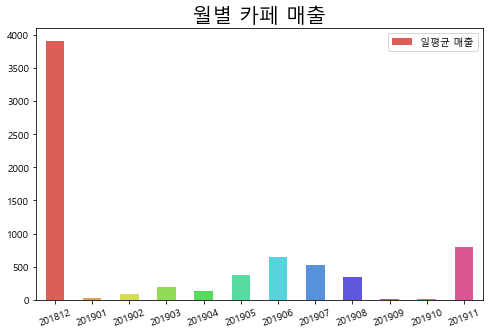

In [253]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

mycolors = sns.color_palette('hls',len(card_amount))

card_amount.plot(kind='bar', rot=20, color=mycolors, figsize=(8,5))

plt.title('월별 카페 매출', size=20)  #차트 제목
#plt.xlabel('기간', size=20)                  #x축 이름
#plt.ylabel('이동 인구수', size=20)           #y축 이름
plt.legend(labels=['일평균 매출'], loc='best', fontsize=10) 

#plt.savefig("./c_project/월별 카드매출.png")
plt.show()

In [250]:
#월별 카드 이용건수 일평균 시각화 
card_cnt = card_cnt.iloc[-1,[1,2,3,4,5,6,7,8,9,10,11,12]]

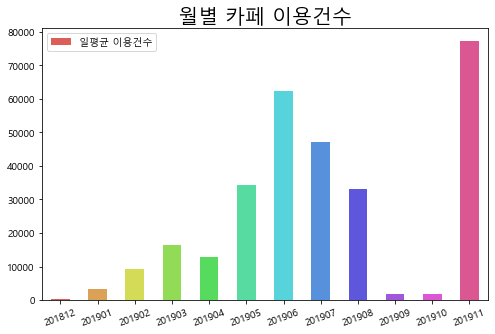

In [254]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

mycolors = sns.color_palette('hls',len(card_amount))

card_cnt.plot(kind='bar', rot=20, color=mycolors, figsize=(8,5))

plt.title('월별 카페 이용건수', size=20)  #차트 제목
#plt.xlabel('기간', size=20)                  #x축 이름
#plt.ylabel('이동 인구수', size=20)           #y축 이름
plt.legend(labels=['일평균 이용건수'], loc='best', fontsize=10) 

#plt.savefig("./c_project/월별 카드이용건수.png")
plt.show()

### 집계구별 유동인구 

In [1]:
import glob
file_list = glob.glob('./c_project/LOCAL_PEOPLE_202008/*.csv')
print(file_list)

['./c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200801.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200802.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200803.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200804.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200805.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200806.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200807.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200808.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200809.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200810.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200811.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200812.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200813.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200814.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200815.csv', './c_project/LOCAL_PEOPLE_202008\\LOCAL_PEOPLE_20200816.csv', './c_pr

In [35]:
file_list[0:15]

['./c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200201.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200202.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200203.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200204.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200205.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200206.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200207.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200208.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200209.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200210.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200211.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200212.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200213.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200214.csv',
 './c_project/LOCAL_PEOPLE_202002\\LOCAL_PEOPLE_20200215.csv']

In [135]:
import pandas as pd
import numpy as np

df = pd.read_csv(file_list[5], encoding='ANSI')

In [136]:
df.head() 

,"?""기준일ID""",시간대구분,행정동코드,집계구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20200806,8,11740590,1125059010210,108.5916,*,*,*,*,4.1152,...,4.2248,*,5.3392,6.9185,4.564,5.9241,6.7011,*,6.0158,6.4934
1,20200806,12,11110615,1101061020301,288.2305,*,*,*,13.9655,13.2088,...,25.2872,41.7663,32.9515,30.3776,10.523,*,*,*,*,*
2,20200806,19,11110615,1101061020301,134.9062,*,*,*,*,*,...,8.7083,5.1968,6.1547,18.5745,5.8986,*,*,*,*,*
3,20200806,0,11170510,1103051020004,59.3866,8.0358,4.4411,*,*,4.2307,...,*,*,*,*,*,4.7353,*,*,*,*
4,20200806,7,11170510,1103051020004,77.0210,12.6606,6.9972,*,*,4.4418,...,*,4.0199,*,*,*,*,*,4.3183,*,*


In [ ]:
import pandas as pd
import numpy as np

full_df = pd.DataFrame()
count = 1
for file in file_list :
    print(file)
    df = pd.read_csv(file, encoding='ANSI')
    
    df = df.iloc[:,[1,3,8,9,10,11,12,13,22,23,24,25,26,27]] # 20~40대 남녀만 선택 
    df = df[(df['시간대구분'] >= 8) & (df['시간대구분'] <= 20)] # 오전 8시부터 오후 8시까지 
    df.drop('시간대구분', axis=1, inplace=True) 

    df.replace('*', 0, inplace=True) # *값 0으로 변환 

    df_jip = df.iloc[:,[0]].astype(str) # 집계구 타입 숫자 -> 문자로 변환 
    df_age = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].astype(float) # 집계구 타입 문자 -> 숫자로 변환 
    df = pd.concat([df_jip, df_age], axis=1) #다시 합치기 

    df[count] = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].sum(axis=1) # 성연령층 합하기 
    df = df[['집계구코드', count]] 
    df = df.groupby('집계구코드').sum() #집계구별로 정리 
    
    full_df = pd.concat([full_df, df], axis=1)
    print(full_df)
    
    count += 1 

In [ ]:
# 5월 19,20일 / 8월 1,2,3,4,5일
import pandas as pd
import numpy as np

#full_df = pd.DataFrame()
count = 6
for file in file_list[5:] :
    print(file)
    df = pd.read_csv(file, encoding='ANSI')
    
    #df_columns = df.columns.values
    #df.reset_index(inplace=True)
    #df.drop([df.columns[33],df.columns[34],df.columns[35],df.columns[36],df.columns[37]], axis=1, inplace=True)
    #df.columns = df_columns
    
    df = df.iloc[:,[1,3,8,9,10,11,12,13,22,23,24,25,26,27]] # 20~40대 남녀만 선택 
    df = df[(df['시간대구분'] >= 8) & (df['시간대구분'] <= 20)] # 오전 8시부터 오후 8시까지 
    df.drop('시간대구분', axis=1, inplace=True) 

    df.replace('*', 0, inplace=True) # *값 0으로 변환 

    df_jip = df.iloc[:,[0]].astype(str) # 집계구 타입 숫자 -> 문자로 변환 
    df_age = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].astype(float) # 집계구 타입 문자 -> 숫자로 변환 
    df = pd.concat([df_jip, df_age], axis=1) #다시 합치기 

    df[count] = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].sum(axis=1) # 성연령층 합하기 
    df = df[['집계구코드', count]] 
    df = df.groupby('집계구코드').sum() #집계구별로 정리 
    
    full_df = pd.concat([full_df, df], axis=1)
    print(full_df)
    
    count += 1 

In [4]:
full_df.to_excel('./c_project/집계구별_유동인구_8월.xlsx', index=True, encoding='utf-8')

In [4]:
# 집계구별 유동인구 1년치 합
import glob

file_list = glob.glob('./c_project/people/*.xlsx')
print(file_list)

['./c_project/people\\집계구별_유동인구_10월.xlsx', './c_project/people\\집계구별_유동인구_11월.xlsx', './c_project/people\\집계구별_유동인구_12월.xlsx', './c_project/people\\집계구별_유동인구_1월.xlsx', './c_project/people\\집계구별_유동인구_2월.xlsx', './c_project/people\\집계구별_유동인구_3월.xlsx', './c_project/people\\집계구별_유동인구_4월.xlsx', './c_project/people\\집계구별_유동인구_5월.xlsx', './c_project/people\\집계구별_유동인구_6월.xlsx', './c_project/people\\집계구별_유동인구_7월.xlsx', './c_project/people\\집계구별_유동인구_8월.xlsx', './c_project/people\\집계구별_유동인구_9월.xlsx']


In [38]:
import pandas as pd

full_df = pd.DataFrame()
for file in file_list :
    df = pd.read_excel(file)    
    index = df.iloc[:,0]
    df.drop(df.columns[0], axis=1, inplace=True)
    full_df = pd.concat([full_df, df], axis=1)
    

In [41]:
full_df.index = index

In [42]:
full_df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
집계구코드,,,,,,,,,,,,,,,,,,,,,
1101053010001,2344.3159,2066.3837,2459.1901,2865.3540,1872.5826,1777.9872,1792.0608,1838.2293,2250.6689,2340.9392,...,1885.8351,1958.9883,1853.8796,1755.7931,1907.4228,2476.1663,2668.5143,1974.0853,1968.6574,2122.8478
1101053010002,8904.2378,9734.6761,11831.5867,13533.3871,11349.5003,12047.9463,12021.6789,11921.0258,12524.7311,13377.0618,...,11722.0749,11996.5299,11743.6557,11537.2843,11808.5430,13602.0536,14035.1744,11231.8356,11360.0122,9714.1735
1101053010003,10399.3224,10577.3433,12089.6871,12983.2302,10557.4529,10919.2801,10863.4277,10771.9843,12601.6545,12945.9765,...,10905.1031,11096.9225,11055.0729,10738.7982,10865.4037,13024.0769,13394.9363,10620.8430,10622.5249,10838.3909
1101053010004,8070.6813,9880.7532,10970.7619,10268.7322,15073.2571,15790.8281,16502.3617,17016.0884,14989.6741,14432.8633,...,15278.2860,15688.6788,16259.0218,16269.1225,16320.2794,14462.9684,11287.0847,15553.7341,14405.9568,9138.5426
1101053010005,7404.0306,9267.6907,8765.0262,8841.5183,10939.4877,11525.5535,12144.6299,12961.1343,11677.6148,11863.6929,...,10881.4191,10879.5397,11629.5655,11899.3938,11486.2239,11892.2895,9846.9748,11512.9131,10961.8205,7965.6975


In [44]:
full_df['people'] = full_df.sum(axis=1)

In [45]:
def division(n) :
    return n/366

In [51]:
people = full_df['people'].apply(lambda x: division(x))

In [55]:
people = pd.DataFrame(people)

In [57]:
people

,people
집계구코드,
1101053010001,1907.881898
1101053010002,11790.208125
1101053010003,10992.648219
1101053010004,15739.234710
1101053010005,11155.114866
...,...
1125074030501,990.265836
1125074030701,3179.218277
1125074030801,2431.428052


In [59]:
people.to_excel('./c_project/people/집계구별_유동인구.xlsx', index=True, encoding='utf-8')

### 집계구별 유동인구 + 카페 + 행정동이름 

In [31]:
import pandas as pd 
cafe_people = pd.read_excel('./c_project/집계구별_카페,유동인구_final.xlsx')
jip_dong = pd.read_excel('./c_project/행정동_집계구.xlsx')

In [32]:
jip_dong.set_index('집계구코드', inplace=True)
cafe_people.set_index('집계구', inplace=True)

In [35]:
cafe_people = cafe_people.join(jip_dong)
cafe_people.drop('행정동코드', axis=1, inplace=True)

cafe_people.reset_index(inplace=True)

In [41]:
cafe_people.to_excel('./c_project/집계구별_카페,유동인구_final.xlsx')